In [1]:
import tensorflow as tf
from tensorflow.keras.layers  import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)
np.random.seed(1)

In [3]:
(x_train, _ ) , (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train = tf.reshape(x_train,[-1,28,28,1])
x_test = tf.reshape(x_test,[-1,28,28,1])

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(0.0,1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(0.0,1.0, size = x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, 0.,1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, 0.,1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


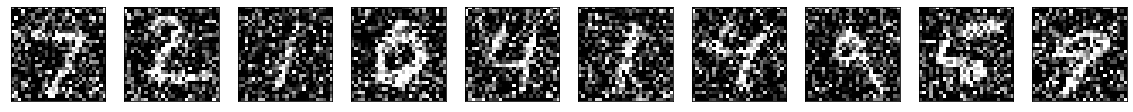

In [14]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(tf.reshape(x_test_noisy[i],[28,28]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



In [16]:
encoder1 = Conv2D(input_shape = (28,28,1), filters =32, kernel_size=(3,3), activation ='relu', padding ='same')
encoder2 = MaxPooling2D((2,2), padding ='same')
encoder3 = Conv2D(32, (3,3), activation ='relu', padding ='same')
encoder4 = MaxPooling2D((2,2), padding='same')

decoder1 = Conv2D(32, (3,3), activation='relu', padding='same')
decoder2 = UpSampling2D((2,2))
decoder3 = Conv2D(32, (3,3), activation='relu', padding='same')
decoder4 = UpSampling2D((2,2))
decoder5 = Conv2D(1, (3,3), activation='relu', padding='same')

encoder = tf.keras.Sequential([encoder1, encoder2, encoder3, encoder4])
decoder = tf.keras.Sequential([decoder1, decoder2, decoder3, decoder4, decoder5])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer ='adadelta', loss='binary_crossentropy')
encoder.summary()
decoder.summary()
autoencoder.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
________________________________

In [17]:
autoencoder.fit(x_train_noisy, x_train, epochs = 100, batch_size =128)

Epoch 1/100
469/469 [==============================] - 35s 7ms/step - loss: 0.5900
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4168
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3620
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3328
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3103
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2906
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2769
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2678
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2592
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2531
Epoch 11/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2466
Epoch 12/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2421
Epoch 13/100

In [19]:
reconstructed_imgs = autoencoder.predict(x_test_noisy)

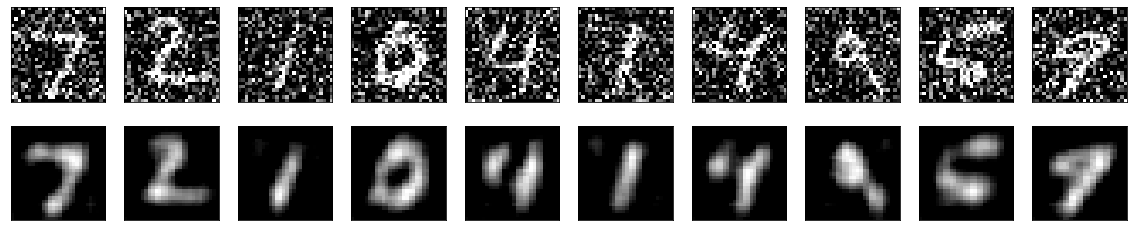

In [22]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(tf.reshape(x_test_noisy[i],[28,28]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(tf.reshape(reconstructed_imgs[i],[28,28]))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


